In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

### Using clustering to show high risk states for youth police Shootings

In [ ]:
# idea: to cluster cities based on percentage of youth cases in the first iteration, also incorporating other features like mental illness signs and armed vs unarmed status

df = pd.read_csv('../datasets/police_shootings_cleaned.csv')

df_1 = pd.read_csv('../datasets/demographic_cleaned.csv')

print(df.head())


         date                name   age gender    armed      race  \
0  2015-01-02    Lewis Lee Lembke  47.0   male      gun     White   
1  2015-01-02          Tim Elliot  53.0   male      gun     Asian   
2  2015-01-03  John Paul Quintero  23.0   male  unarmed  Hispanic   
3  2015-01-04   Kenneth Joe Brown  18.0   male      gun     White   
4  2015-01-04     Matthew Hoffman  32.0   male  replica     White   

            city state flee  body_camera  signs_of_mental_illness  \
0          Aloha    OR  not        False                    False   
1        Shelton    WA  not        False                     True   
2        Wichita    KS  not        False                    False   
3        Guthrie    OK  not        False                    False   
4  San Francisco    CA  not        False                     True   

              police_departments_involved age_group  
0  Washington County Sheriff's Office, OR     46-55  
1       Mason County Sheriff's Office, WA     46-55  
2       

In [245]:
# youth is <=25 take only that
df = df[df['age'] <= 25]
#print number of rows
print(df.shape)

(1368, 13)


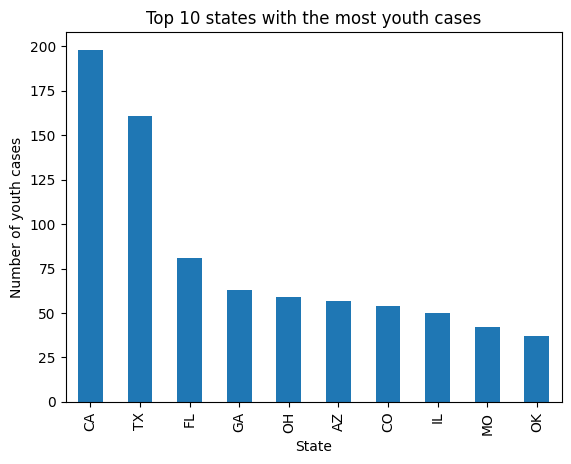

In [ ]:
# plot a bar graph of the number of youth cases for top 10 states with the most youth cases

df['state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 states with the most youth cases')
plt.xlabel('State')
plt.ylabel('Number of youth cases')
plt.show()

# save the png in clustering folder
if not os.path.exists('clustering'):
    os.makedirs('clustering')
plt.savefig('clustering/youth_cases.png')


In [247]:
def get_2020pop(state):
    pop = pd.read_csv('../datasets/demographic_cleaned.csv')
    pop = pop[pop['NAME'] == state]
    pop = pop[pop['AGE'] <= 25]
    pop = sum(pop['POPESTIMATE2020'])
    return pop

In [248]:
# get keys to different states
states = df['state'].unique()
print(states)

['KS' 'OK' 'AZ' 'CA' 'MN' 'MO' 'TX' 'CO' 'MI' 'MD' 'FL' 'UT' 'NC' 'AL'
 'SC' 'IL' 'WI' 'GA' 'WA' 'OH' 'NY' 'LA' 'IN' 'VA' 'NJ' 'PA' 'WY' 'TN'
 'KY' 'NV' 'NH' 'AK' 'NM' 'IA' 'DC' 'MT' 'ME' 'OR' 'SD' 'CT' 'RI' 'MS'
 'HI' 'NE' 'DE' 'AR' 'WV' 'ND' 'ID' 'MA']


In [249]:
# print percentage of youth cases in each state
# get different 
# ['KS' 'OK' 'AZ' 'CA' 'MN' 'MO' 'TX' 'CO' 'MI' 'MD' 'FL' 'UT' 'NC' 'AL'
#  'SC' 'IL' 'WI' 'GA' 'WA' 'OH' 'NY' 'LA' 'IN' 'VA' 'NJ' 'PA' 'WY' 'TN'
#  'KY' 'NV' 'NH' 'AK' 'NM' 'IA' 'DC' 'MT' 'ME' 'OR' 'SD' 'CT' 'RI' 'MS'
#  'HI' 'NE' 'DE' 'AR' 'WV' 'ND' 'ID' 'MA']

dict = {
    'KS': 'Kansas', 'OK': 'Oklahoma', 'AZ': 'Arizona', 'CA': 'California', 'MN': 'Minnesota', 'MO': 'Missouri', 'TX': 'Texas', 'CO': 'Colorado', 'MI': 'Michigan', 'MD': 'Maryland', 'FL': 'Florida', 'UT': 'Utah', 'NC': 'North Carolina', 'AL': 'Alabama',
    'SC': 'South Carolina', 'IL': 'Illinois', 'WI': 'Wisconsin', 'GA': 'Georgia', 'WA': 'Washington', 'OH': 'Ohio', 'NY': 'New York', 'LA': 'Louisiana', 'IN': 'Indiana', 'VA': 'Virginia', 'NJ': 'New Jersey', 'PA': 'Pennsylvania', 'WY': 'Wyoming', 'TN': 'Tennessee',
    'KY': 'Kentucky', 'NV': 'Nevada', 'NH': 'New Hampshire', 'AK': 'Alaska', 'NM': 'New Mexico', 'IA': 'Iowa', 'DC': 'District of Columbia', 'MT': 'Montana', 'ME': 'Maine', 'OR': 'Oregon', 'SD': 'South Dakota', 'CT': 'Connecticut', 'RI': 'Rhode Island', 'MS': 'Mississippi',
    'HI': 'Hawaii', 'NE': 'Nebraska', 'DE': 'Delaware', 'AR': 'Arkansas', 'WV': 'West Virginia', 'ND': 'North Dakota', 'ID': 'Idaho', 'MA': 'Massachusetts'
}
dict_inv = {v: k for k, v in dict.items()}

youthpop_bystate = {}

for state in states:
    pop = get_2020pop(dict[state])
    num = df['state'].value_counts()[state]
    youthpop_bystate[state] = num/pop*1000000

# sort youthpop_bystate by values reverse

state_pair = []
for t in sorted(youthpop_bystate.items(), key=lambda x: x[1], reverse=True):
    state_pair.append(t)

print(state_pair)

[('AK', np.float64(23.262666521921187)), ('NM', np.float64(15.705916704384663)), ('DC', np.float64(15.494267121165167)), ('CO', np.float64(14.428125225439457)), ('OK', np.float64(13.213389091454507)), ('AZ', np.float64(12.0165246186967)), ('MO', np.float64(10.333069266007646)), ('NV', np.float64(10.117269268086389)), ('GA', np.float64(8.50726412327377)), ('LA', np.float64(8.199202785206115)), ('WY', np.float64(7.801529099703543)), ('OH', np.float64(7.692085053079299)), ('CA', np.float64(7.575356431997938)), ('TX', np.float64(7.539245519136057)), ('MT', np.float64(7.22858819889605)), ('MD', np.float64(6.800209345704006)), ('ME', np.float64(6.649395968870188)), ('DE', np.float64(6.558430698702415)), ('WV', np.float64(6.504826581323342)), ('FL', np.float64(6.451769122884377)), ('SD', np.float64(6.423742150990059)), ('UT', np.float64(6.180968579591605)), ('IL', np.float64(5.971418402956091)), ('TN', np.float64(5.957981665304422)), ('MS', np.float64(5.879920268281162)), ('AR', np.float64(5.

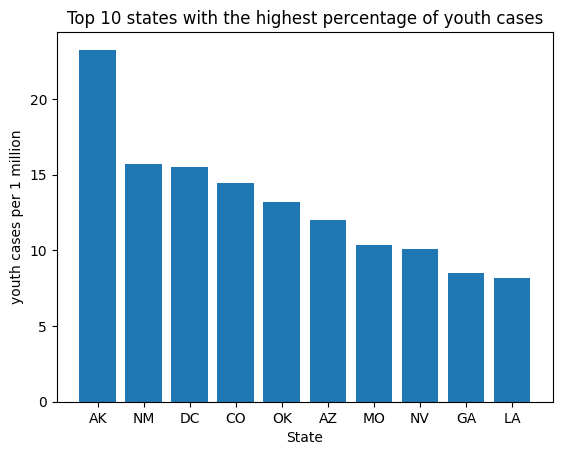

In [ ]:
# plot top 10 states with the highest percentage of youth cases as a bar chart
import os

# plt.bar(youthpop_bystate[:10].keys(), youthpop_bystate[:10].values())
plt.bar([state for state, perc in state_pair[:10]], [perc for state, perc in state_pair[:10]])
plt.title('Top 10 states with the highest percentage of youth cases')
plt.xlabel('State')
plt.ylabel('youth cases per 1 million')
plt.show()

#save png in clustering folder
if not os.path.exists('clustering'):
    os.makedirs('clustering')
plt.savefig('clustering/youth_rate.png')




In [251]:
df3 = pd.read_csv('../datasets/socio-economic.csv')
# df3.drop('Racial characteristics of population', 'Median household income', '% foreign born population', inplace=True, axis=1)
df3 = df3.drop(['Racial characteristics of population', 'Median household income', '% foreign born population', 'Life expectancy in years 2022' ], axis=1)
#replace '% of people in povery' by poverty rate
df3['Poverty rate'] = df3['% of people in poverty'].str.replace('%', '').astype(float)
df3 = df3.drop(['% of people in poverty'], axis=1)

df3['higher_studies'] = df3['% of 25+ year old people with bachelor or higher degrees'].str.replace('%', '').astype(float)
df3 = df3.drop(['% of 25+ year old people with bachelor or higher degrees'], axis=1)

df3['without_health_insurance'] = df3['% of people without health insurance'].str.replace('%', '').astype(float)
df3 = df3.drop(['% of people without health insurance'], axis=1)

# change 
# df3['state'] = dict_inv[df3['state']]
# remove vermont
df3 = df3[df3['state'] != 'Vermont']
df3['state'] = [dict_inv[s] for s in df3['state']]

# sort by per capita income

df3 = df3.sort_values(by='Per capita income')
print(df3.head(10))

   state Per capita income  Poverty rate  higher_studies  \
24    MS           $26,807          19.4            23.2   
48    WV           $28,761          16.8            21.8   
3     AR           $29,210          16.3            24.3   
31    NM           $29,624          18.4            28.5   
18    LA           $30,340          19.6            25.5   
0     AL           $30,458          16.1            26.7   
17    KY           $30,634          16.5            25.7   
36    OK           $30,976          15.5            26.8   
12    ID           $31,509          11.0            29.1   
14    IN           $32,537          12.2            27.8   

    without_health_insurance  
24                      14.2  
48                       7.6  
3                       11.0  
31                      12.0  
18                       9.0  
0                       11.8  
17                       6.7  
36                      16.3  
12                      10.5  
14                       8.9 

In [252]:
df3 = df3.sort_values(by='Poverty rate',  ascending=False)
print(df3.head(10))

   state Per capita income  Poverty rate  higher_studies  \
18    LA           $30,340          19.6            25.5   
24    MS           $26,807          19.4            23.2   
31    NM           $29,624          18.4            28.5   
48    WV           $28,761          16.8            21.8   
17    KY           $30,634          16.5            25.7   
8     DC           $63,793          16.5            61.4   
3     AR           $29,210          16.3            24.3   
0     AL           $30,458          16.1            26.7   
36    OK           $30,976          15.5            26.8   
40    SC           $32,823          14.6            29.8   

    without_health_insurance  
18                       9.0  
24                      14.2  
31                      12.0  
48                       7.6  
17                       6.7  
8                        4.1  
3                       11.0  
0                       11.8  
36                      16.3  
40                      12.2 

In [253]:
df3 = df3.sort_values(by='higher_studies')
print(df3.head())


   state Per capita income  Poverty rate  higher_studies  \
48    WV           $28,761          16.8            21.8   
24    MS           $26,807          19.4            23.2   
3     AR           $29,210          16.3            24.3   
18    LA           $30,340          19.6            25.5   
17    KY           $30,634          16.5            25.7   

    without_health_insurance  
48                       7.6  
24                      14.2  
3                       11.0  
18                       9.0  
17                       6.7  


In [254]:
df3 = df3.sort_values(by='without_health_insurance',  ascending=False)
print(df3.head())

   state Per capita income  Poverty rate  higher_studies  \
43    TX           $34,255          14.2            31.5   
36    OK           $30,976          15.5            26.8   
9     FL           $35,216          13.1            31.5   
50    WY           $36,288          11.4            28.5   
10    GA           $34,516          14.0            33.0   

    without_health_insurance  
43                      20.4  
36                      16.3  
9                       15.1  
50                      14.8  
10                      14.7  


In [255]:

# change state to dict_inv[state]
print(df3.head())
# df3['Per capita income']
df3['per_capita_income'] = df3['Per capita income']
df3 = df3.drop(['Per capita income'], axis=1)

df3['poverty_rate'] = df3['Poverty rate']
df3 = df3.drop(['Poverty rate'], axis=1)


   state Per capita income  Poverty rate  higher_studies  \
43    TX           $34,255          14.2            31.5   
36    OK           $30,976          15.5            26.8   
9     FL           $35,216          13.1            31.5   
50    WY           $36,288          11.4            28.5   
10    GA           $34,516          14.0            33.0   

    without_health_insurance  
43                      20.4  
36                      16.3  
9                       15.1  
50                      14.8  
10                      14.7  


In [256]:
# make a new pandas frame and merge state_pair with df3
import pandas as pd

data = pd.DataFrame(state_pair, columns=['state', 'youth_cases'])
print(data.head())

print(df3.shape, data.shape)

  state  youth_cases
0    AK    23.262667
1    NM    15.705917
2    DC    15.494267
3    CO    14.428125
4    OK    13.213389
(50, 5) (50, 2)


In [257]:
# merge data and df3
data = pd.merge(data, df3, on='state')
# convert per_capita_income to float
#  $39,236  
data['per_capita_income'] = data['per_capita_income'].str.replace('$', '').str.replace(',', '').astype(float)
print(data.head())

  state  youth_cases  higher_studies  without_health_insurance  \
0    AK    23.262667            30.6                      12.9   
1    NM    15.705917            28.5                      12.0   
2    DC    15.494267            61.4                       4.1   
3    CO    14.428125            42.8                       9.3   
4    OK    13.213389            26.8                      16.3   

   per_capita_income  poverty_rate  
0            39236.0          10.5  
1            29624.0          18.4  
2            63793.0          16.5  
3            42807.0           9.7  
4            30976.0          15.5  


In [258]:
# print order of percapita income, poverty rate, higher studies, without health insurance
print("sorted by per capita income")
data = data.sort_values(by='per_capita_income')
print(data.head(10))

print("sorted by poverty rate")
data = data.sort_values(by='poverty_rate',  ascending=False)
print(data.head(10))

print("sorted by higher studies")
data = data.sort_values(by='higher_studies')
print(data.head(10))

print("sorted by without health insurance")
data = data.sort_values(by='without_health_insurance',  ascending=False)
print(data.head(10))


sorted by per capita income
   state  youth_cases  higher_studies  without_health_insurance  \
24    MS     5.879920            23.2                      14.2   
18    WV     6.504827            21.8                       7.6   
25    AR     5.868958            24.3                      11.0   
1     NM    15.705917            28.5                      12.0   
9     LA     8.199203            25.5                       9.0   
37    AL     4.217302            26.7                      11.8   
33    KY     4.685885            25.7                       6.7   
4     OK    13.213389            26.8                      16.3   
35    ID     4.525508            29.1                      10.5   
28    IN     5.547457            27.8                       8.9   

    per_capita_income  poverty_rate  
24            26807.0          19.4  
18            28761.0          16.8  
25            29210.0          16.3  
1             29624.0          18.4  
9             30340.0          19.6  
37    

In [259]:
print(data.isnull().sum())  # Check for missing values
print(data.shape)           # Ensure the dataset is not empty

data2 = data

state                       0
youth_cases                 0
higher_studies              0
without_health_insurance    0
per_capita_income           0
poverty_rate                0
dtype: int64
(50, 6)


In [260]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import nbformat
import plotly.io as pio

pio.renderers.default = 'browser'



# Normalize data for clustering
scaler = StandardScaler()

# Iteration 1: Clustering Without Socio-Economic Data
iteration1_features = ['youth_cases']
if data[iteration1_features].shape[0] > 0:
    data['youth_cases_scaled'] = scaler.fit_transform(data[iteration1_features])
    kmeans1 = KMeans(n_clusters=3, random_state=42)
    data['cluster_iteration1'] = kmeans1.fit_predict(data[['youth_cases_scaled']])
else:
    print("No data available for Iteration 1 scaling.")

# Interactive Visualization for Iteration 1
fig1 = px.scatter(
    data,
    x='youth_cases',
    y='youth_cases',
    color='cluster_iteration1',
    text='state',
    title="Iteration 1: Clustering Based on Youth Cases",
    labels={'youth_cases': 'Youth Cases'},
    color_continuous_scale=px.colors.sequential.Viridis
)
fig1.update_traces(marker_size=12)
fig1.show()

# Iteration 2: Clustering With Socio-Economic Data
iteration2_features = ['youth_cases', 'per_capita_income', 'poverty_rate', 'higher_studies']
if data[iteration2_features].shape[0] > 0:
    data[iteration2_features] = scaler.fit_transform(data[iteration2_features])
    kmeans2 = KMeans(n_clusters=3, random_state=42)
    data['cluster_iteration2'] = kmeans2.fit_predict(data[iteration2_features])
else:
    print("No data available for Iteration 2 scaling.")

# Interactive Visualization for Iteration 2
fig2 = px.scatter(
    data,
    x='poverty_rate',
    y='youth_cases',
    color='cluster_iteration2',
    text='state',
    title="Iteration 2: Clustering With Socio-Economic Data",
    labels={'poverty_rate': 'Poverty Rate', 'youth_cases': 'Youth Cases'},
    color_continuous_scale=px.colors.sequential.Plasma
)
fig2.update_traces(marker_size=12)
fig2.show()

# save the html files
fig1.write_html("iteration1.html")
fig2.write_html("iteration2.html")


In [261]:
data2['numofcases'] = data['youth_cases']


#get count of each state cases into data2['numofcases]
youth_count = {}
youth_pop = {}
for state in states:
    num = df['state'].value_counts()[state]
    youth_count[state] = num
    youth_pop[state] = get_2020pop(dict[state])
print(youth_count)


for state in states:
    data2.loc[data2['state'] == state, 'numofcases'] = youth_count[state]
    data2.loc[data2['state'] == state, 'youth_population'] = youth_pop[state]

print(data2.head())



{'KS': np.int64(12), 'OK': np.int64(37), 'AZ': np.int64(57), 'CA': np.int64(198), 'MN': np.int64(20), 'MO': np.int64(42), 'TX': np.int64(161), 'CO': np.int64(54), 'MI': np.int64(23), 'MD': np.int64(27), 'FL': np.int64(81), 'UT': np.int64(17), 'NC': np.int64(35), 'AL': np.int64(14), 'SC': np.int64(15), 'IL': np.int64(50), 'WI': np.int64(20), 'GA': np.int64(63), 'WA': np.int64(28), 'OH': np.int64(59), 'NY': np.int64(33), 'LA': np.int64(26), 'IN': np.int64(26), 'VA': np.int64(24), 'NJ': np.int64(16), 'PA': np.int64(29), 'WY': np.int64(3), 'TN': np.int64(27), 'KY': np.int64(14), 'NV': np.int64(20), 'NH': np.int64(3), 'AK': np.int64(12), 'NM': np.int64(22), 'IA': np.int64(7), 'DC': np.int64(6), 'MT': np.int64(5), 'ME': np.int64(5), 'OR': np.int64(14), 'SD': np.int64(4), 'CT': np.int64(3), 'RI': np.int64(1), 'MS': np.int64(12), 'HI': np.int64(3), 'NE': np.int64(3), 'DE': np.int64(4), 'AR': np.int64(12), 'WV': np.int64(7), 'ND': np.int64(2), 'ID': np.int64(6), 'MA': np.int64(6)}
   state  you